# 1. Read in

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pylab 

In [2]:
pylab.rcParams['figure.figsize'] = 8, 6
%matplotlib inline

In [3]:
df = pd.read_csv('./data/data_cleaned/national_level_aggragated_data_from_2000.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 27 columns):
year                                16 non-null int64
enroll                              16 non-null float64
total_revenue                       16 non-null int64
federal_revenue                     16 non-null int64
state_revenue                       16 non-null int64
local_revenue                       16 non-null int64
total_expenditure                   16 non-null int64
instruction_expenditure             16 non-null int64
support_services_expenditure        16 non-null int64
other_expenditure                   16 non-null float64
capital_outlay_expenditure          16 non-null int64
total_known_expenditure             16 non-null float64
unknown_expenditure                 16 non-null float64
rev_per_enroll                      16 non-null float64
population                          16 non-null float64
known_property_crimes               16 non-null float64
teachers_elem_secd_

In [5]:
df.head()

,year,enroll,total_revenue,federal_revenue,state_revenue,local_revenue,total_expenditure,instruction_expenditure,support_services_expenditure,other_expenditure,...,pub_high_school_graduates,avg_attendence_elem_secd_schools,pupil_teacher_ratio,high_school_completers_18_to_24,bachelor_completers_over_25,expenditure_per_pupil,gdp_per_capita,income_per_capita,unemployment_rate,dollar_index
0,2000,46432782.0,379602220,26672292,186191266,166738654,386177409,198033848,108952594,17969490.0,...,2.553844e+06,858955.411765,15.631364,0.765741,0.240765,7395.068944,44677.803922,29500.352941,0.039052,104.144917
1,2001,46731110.0,408404990,28625219,200833658,178946113,417014891,212719094,118193372,19202023.0,...,2.618187e+06,874599.843137,15.527110,0.776261,0.245590,7891.482241,44920.666667,30566.568627,0.045340,110.132250
2,2002,47114728.0,426548936,32703469,207374637,186470830,442685445,224842230,125079958,20239470.0,...,2.672161e+06,882693.333333,15.437662,0.786177,0.250233,8315.268641,45455.098039,30970.372549,0.053590,110.130917
3,2003,47603240.0,447668013,36805859,215551319,195310835,462275098,236429160,132947081,20894960.0,...,2.716875e+06,888739.823529,15.359792,0.795489,0.254691,8668.928123,46365.058824,31927.313725,0.055992,103.441000
4,2004,47854683.0,470489151,41300957,218098876,211089318,481241595,245192668,138496636,21542747.0,...,2.753438e+06,888525.647059,15.290270,0.804199,0.258964,9033.744591,47625.294118,33526.725490,0.052152,98.798083


In [6]:
df.columns

Index(['year', 'enroll', 'total_revenue', 'federal_revenue', 'state_revenue',
       'local_revenue', 'total_expenditure', 'instruction_expenditure',
       'support_services_expenditure', 'other_expenditure',
       'capital_outlay_expenditure', 'total_known_expenditure',
       'unknown_expenditure', 'rev_per_enroll', 'population',
       'known_property_crimes', 'teachers_elem_secd_schools',
       'pub_high_school_graduates', 'avg_attendence_elem_secd_schools',
       'pupil_teacher_ratio', 'high_school_completers_18_to_24',
       'bachelor_completers_over_25', 'expenditure_per_pupil',
       'gdp_per_capita', 'income_per_capita', 'unemployment_rate',
       'dollar_index'],
      dtype='object')

Normalize currency related values to dollar index

In [35]:
currency_related = ['total_revenue', 'federal_revenue', 'state_revenue',
       'local_revenue', 'total_expenditure', 'instruction_expenditure',
       'support_services_expenditure', 'other_expenditure',
       'capital_outlay_expenditure', 'total_known_expenditure',
       'unknown_expenditure', 'rev_per_enroll',
       'expenditure_per_pupil', 'gdp_per_capita',
       'income_per_capita']

In [36]:
df[currency_related] = df[currency_related].apply(lambda x: x / df.dollar_index)

# 2. Stats on raw values

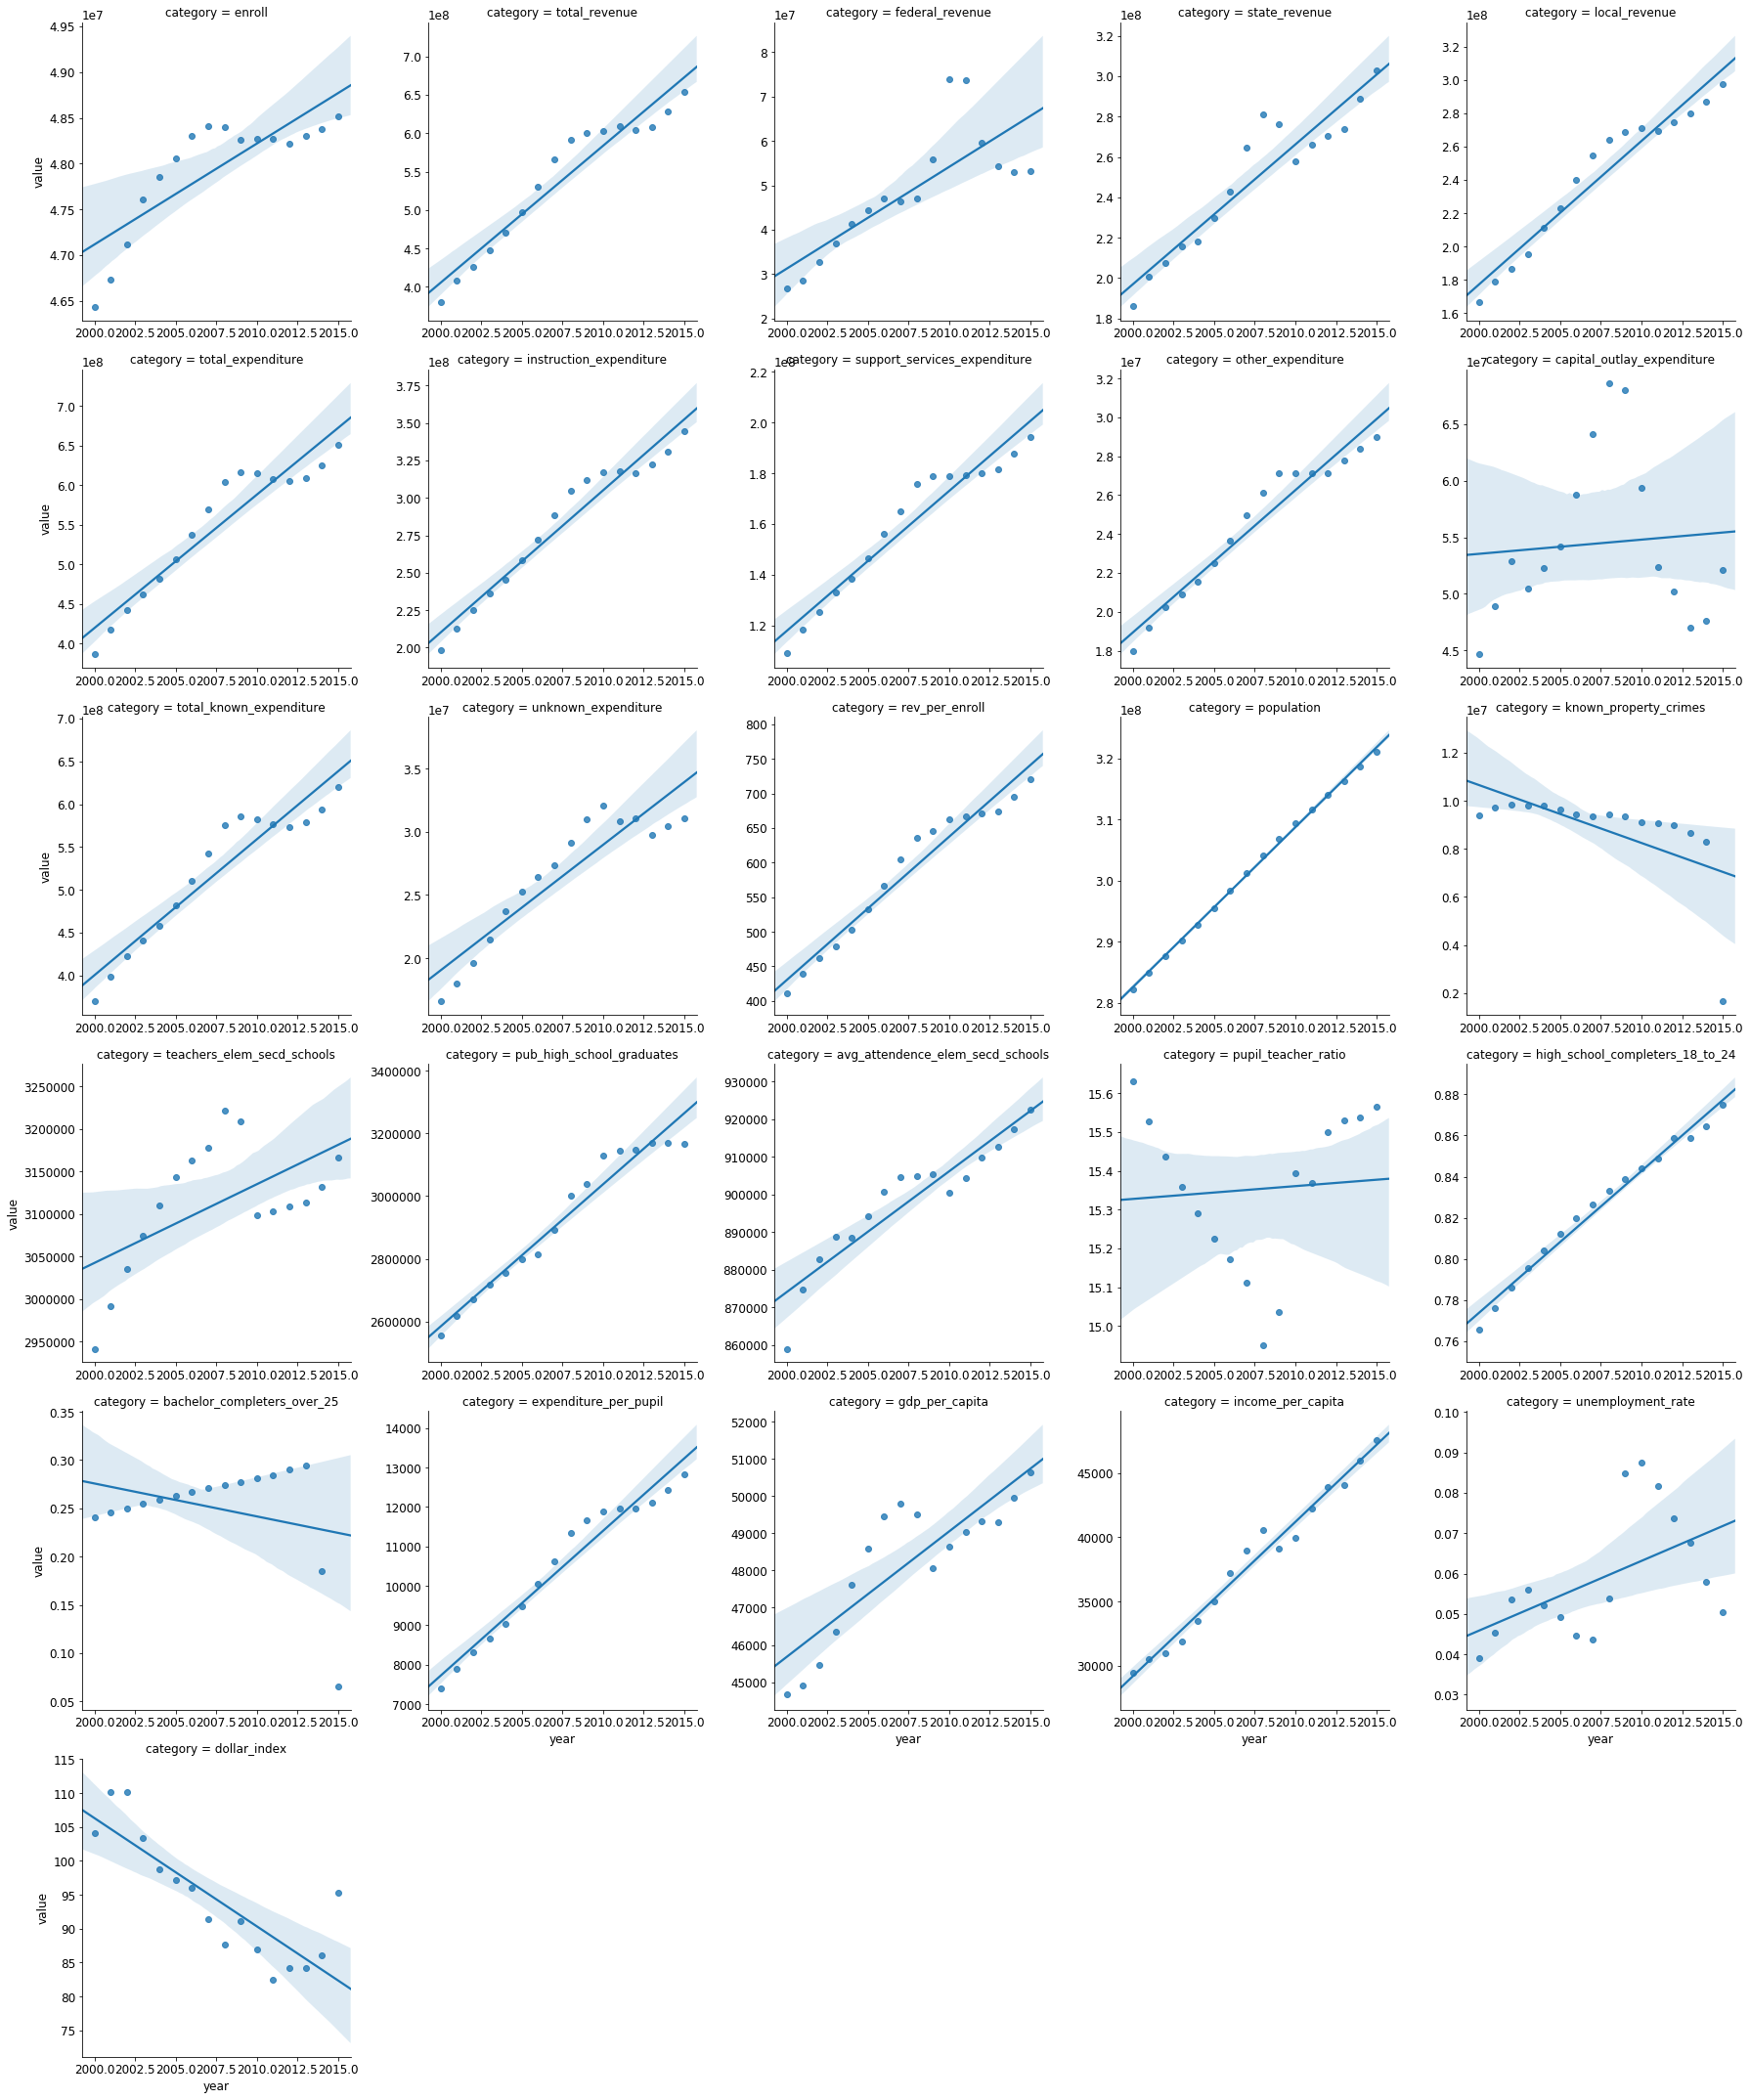

In [7]:
plt.rcParams['font.size'] = 12
sns.lmplot(data = df.melt(id_vars = 'year', value_name = 'value', var_name = 'category',  value_vars = df.columns[1:]),
           x = 'year',
           y = 'value',
           col = 'category',
           col_wrap = 5,
           sharex = False,
           sharey = False)

In [39]:
df.columns

Index(['year', 'enroll', 'total_revenue', 'federal_revenue', 'state_revenue',
       'local_revenue', 'total_expenditure', 'instruction_expenditure',
       'support_services_expenditure', 'other_expenditure',
       'capital_outlay_expenditure', 'total_known_expenditure',
       'unknown_expenditure', 'rev_per_enroll', 'population',
       'known_property_crimes', 'teachers_elem_secd_schools',
       'pub_high_school_graduates', 'avg_attendence_elem_secd_schools',
       'pupil_teacher_ratio', 'high_school_completers_18_to_24',
       'bachelor_completers_over_25', 'expenditure_per_pupil',
       'gdp_per_capita', 'income_per_capita', 'unemployment_rate',
       'dollar_index'],
      dtype='object')

## 2.1 National level revenue expenditure subcategory correlation

In [8]:
category_expenditures = ['instruction_expenditure',
       'support_services_expenditure', 'other_expenditure',
       'capital_outlay_expenditure']
category_revenues = ['federal_revenue', 'state_revenue',
       'local_revenue']

corr_category = df.corr()

corr_category.head()

,year,enroll,total_revenue,federal_revenue,state_revenue,local_revenue,total_expenditure,instruction_expenditure,support_services_expenditure,other_expenditure,...,pub_high_school_graduates,avg_attendence_elem_secd_schools,pupil_teacher_ratio,high_school_completers_18_to_24,bachelor_completers_over_25,expenditure_per_pupil,gdp_per_capita,income_per_capita,unemployment_rate,dollar_index
year,1.000000,0.820188,0.962747,0.789331,0.941555,0.969696,0.948000,0.975440,0.965686,0.974453,...,0.977406,0.934014,0.077179,0.992493,-0.291583,0.978659,0.856239,0.989558,0.531642,-0.836134
enroll,0.820188,1.000000,0.906915,0.758751,0.888513,0.907195,0.914701,0.891410,0.908039,0.885488,...,0.829067,0.932289,-0.434536,0.878227,-0.060922,0.874767,0.959897,0.833507,0.427953,-0.808926
total_revenue,0.962747,0.906915,1.000000,0.841760,0.980596,0.997894,0.997655,0.997614,0.999236,0.996300,...,0.972878,0.949054,-0.173461,0.980884,-0.178612,0.995500,0.908461,0.966645,0.569373,-0.880775
federal_revenue,0.789331,0.758751,0.841760,1.000000,0.726977,0.826151,0.844986,0.845064,0.837784,0.841517,...,0.875550,0.710768,-0.120022,0.813977,0.120059,0.850071,0.697731,0.753083,0.818800,-0.862324
state_revenue,0.941555,0.888513,0.980596,0.726977,1.000000,0.978920,0.978490,0.975184,0.980653,0.974479,...,0.930931,0.957005,-0.209041,0.957788,-0.268695,0.970340,0.903443,0.960685,0.453332,-0.815914


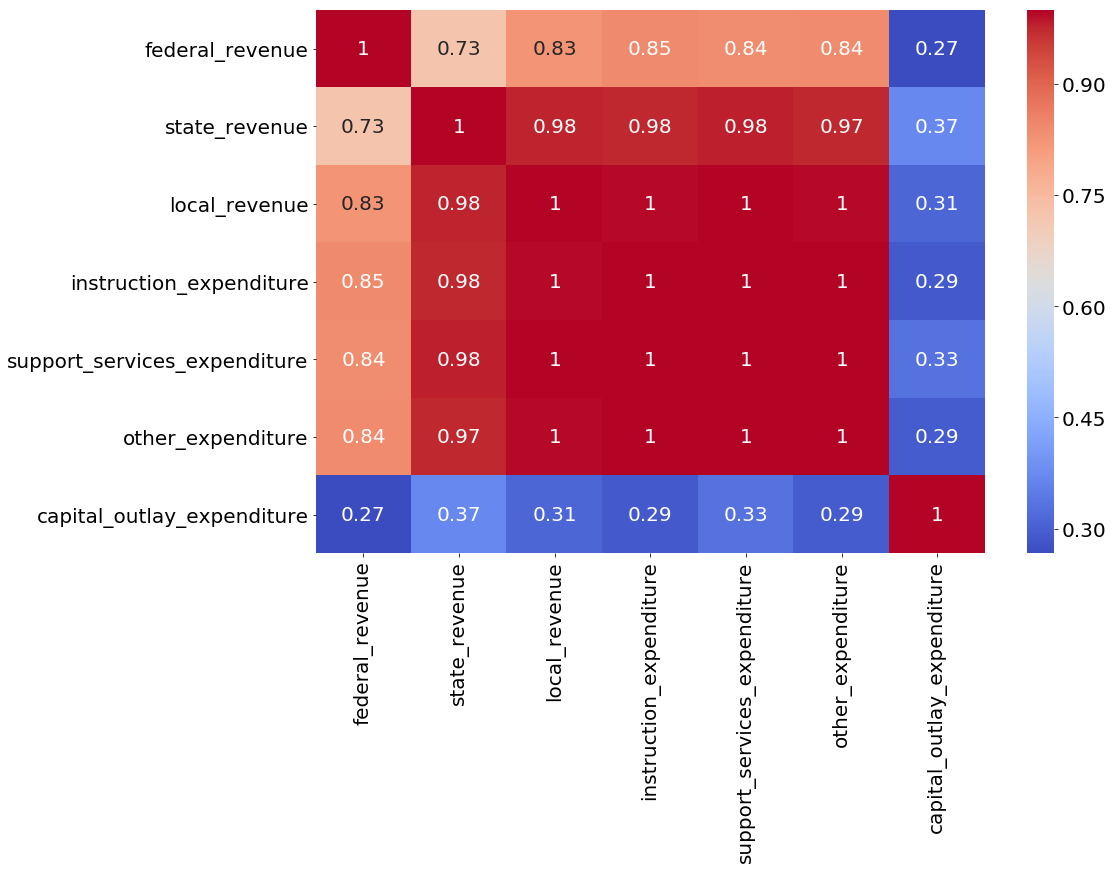

In [9]:
plt.figure(figsize = (15, 10))
plt.rcParams['font.size'] = 20
#sns.heatmap(corr_category.loc[category_revenues, category_expenditures], annot = True)
sns.heatmap(corr_category.loc[category_revenues + category_expenditures, category_revenues + category_expenditures], cmap = 'coolwarm',annot = True)

## 2.2 National level income outcome correlation

In [10]:
df.columns

Index(['year', 'enroll', 'total_revenue', 'federal_revenue', 'state_revenue',
       'local_revenue', 'total_expenditure', 'instruction_expenditure',
       'support_services_expenditure', 'other_expenditure',
       'capital_outlay_expenditure', 'total_known_expenditure',
       'unknown_expenditure', 'rev_per_enroll', 'population',
       'known_property_crimes', 'teachers_elem_secd_schools',
       'pub_high_school_graduates', 'avg_attendence_elem_secd_schools',
       'pupil_teacher_ratio', 'high_school_completers_18_to_24',
       'bachelor_completers_over_25', 'expenditure_per_pupil',
       'gdp_per_capita', 'income_per_capita', 'unemployment_rate',
       'dollar_index'],
      dtype='object')

In [13]:
income_outcome = ['year', 'enroll', 'total_revenue', 'total_expenditure',
                  'rev_per_enroll', 'population',
       'known_property_crimes', 'teachers_elem_secd_schools',
       'pub_high_school_graduates', 'avg_attendence_elem_secd_schools',
       'pupil_teacher_ratio', 'high_school_completers_18_to_24',
       'bachelor_completers_over_25', 'expenditure_per_pupil',
       'gdp_per_capita', 'income_per_capita', 'unemployment_rate',
       'dollar_index']

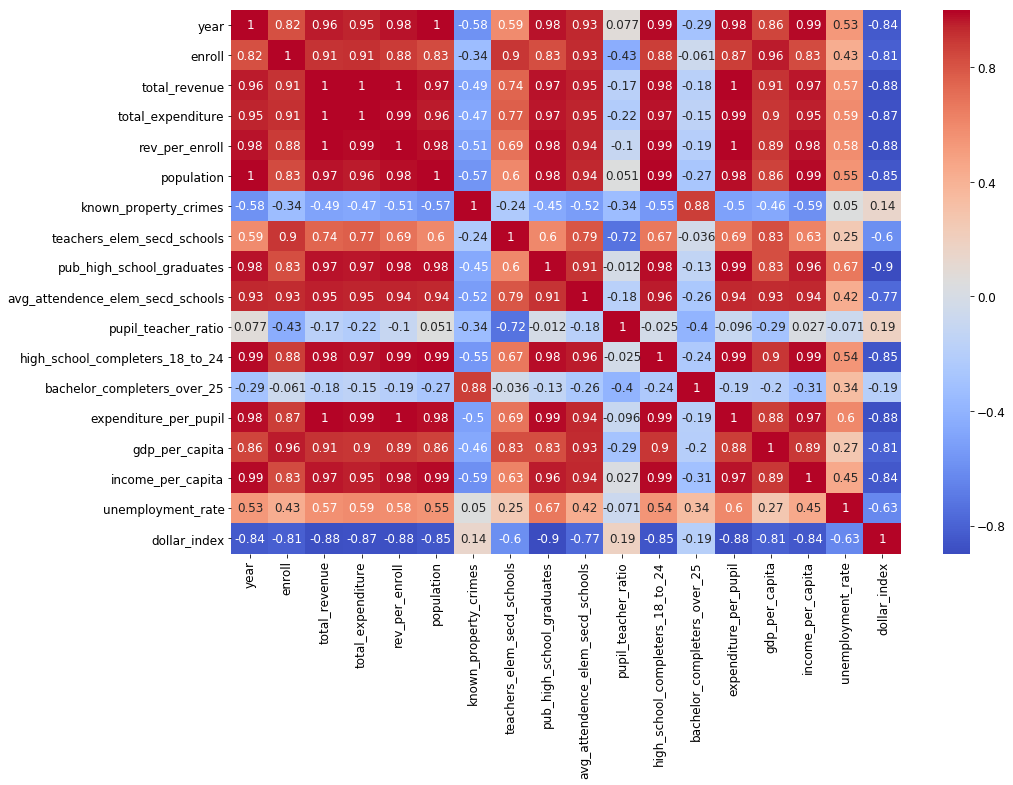

In [14]:
plt.rcParams['font.size'] = 12
covs = df[income_outcome].corr()
plt.figure(figsize = (15, 10))
sns.heatmap(covs, cmap = 'coolwarm', annot=True)

# 3. Percent change rate analysis

In [33]:
df_change = df.copy()
df_change[df.columns[1:]] = df_change[df.columns[1:]].pct_change()

df_change.columns = ['year'] + list(df_change.columns[1:] + '_pct_change')
df_change = df_change.dropna(axis=0, how = 'any')
category_revenues_change = [x + '_pct_change' for x in category_revenues]
category_expenditures_change = [x + '_pct_change' for x in category_expenditures]

In [34]:
df_change.head()

,year,enroll_pct_change,total_revenue_pct_change,federal_revenue_pct_change,state_revenue_pct_change,local_revenue_pct_change,total_expenditure_pct_change,instruction_expenditure_pct_change,support_services_expenditure_pct_change,other_expenditure_pct_change,...,pub_high_school_graduates_pct_change,avg_attendence_elem_secd_schools_pct_change,pupil_teacher_ratio_pct_change,high_school_completers_18_to_24_pct_change,bachelor_completers_over_25_pct_change,expenditure_per_pupil_pct_change,gdp_per_capita_pct_change,income_per_capita_pct_change,unemployment_rate_pct_change,dollar_index_pct_change
1,2001,0.006425,0.075876,0.073219,0.078642,0.073213,0.079853,0.074155,0.084815,0.068590,...,0.025195,0.018213,-0.006670,0.013738,0.020041,0.067128,0.005436,0.036142,0.161004,0.057490
2,2002,0.008209,0.044426,0.142471,0.032569,0.042050,0.061558,0.056991,0.058265,0.054028,...,0.020615,0.009254,-0.005761,0.012774,0.018904,0.053702,0.011897,0.013211,0.181959,-0.000012
3,2003,0.010369,0.049511,0.125442,0.039430,0.047407,0.044252,0.051534,0.062897,0.032387,...,0.016733,0.006850,-0.005044,0.011845,0.017817,0.042531,0.020019,0.030899,0.044821,-0.060745
4,2004,0.005282,0.050978,0.122130,0.011819,0.080787,0.041029,0.037066,0.041743,0.031002,...,0.013458,-0.000241,-0.004526,0.010949,0.016777,0.042083,0.027181,0.050095,-0.068579,-0.044885
5,2005,0.004191,0.056007,0.073952,0.052394,0.056228,0.052749,0.053614,0.056542,0.044507,...,0.016638,0.006311,-0.004212,0.010081,0.015779,0.050282,0.020203,0.045270,-0.056177,-0.016723


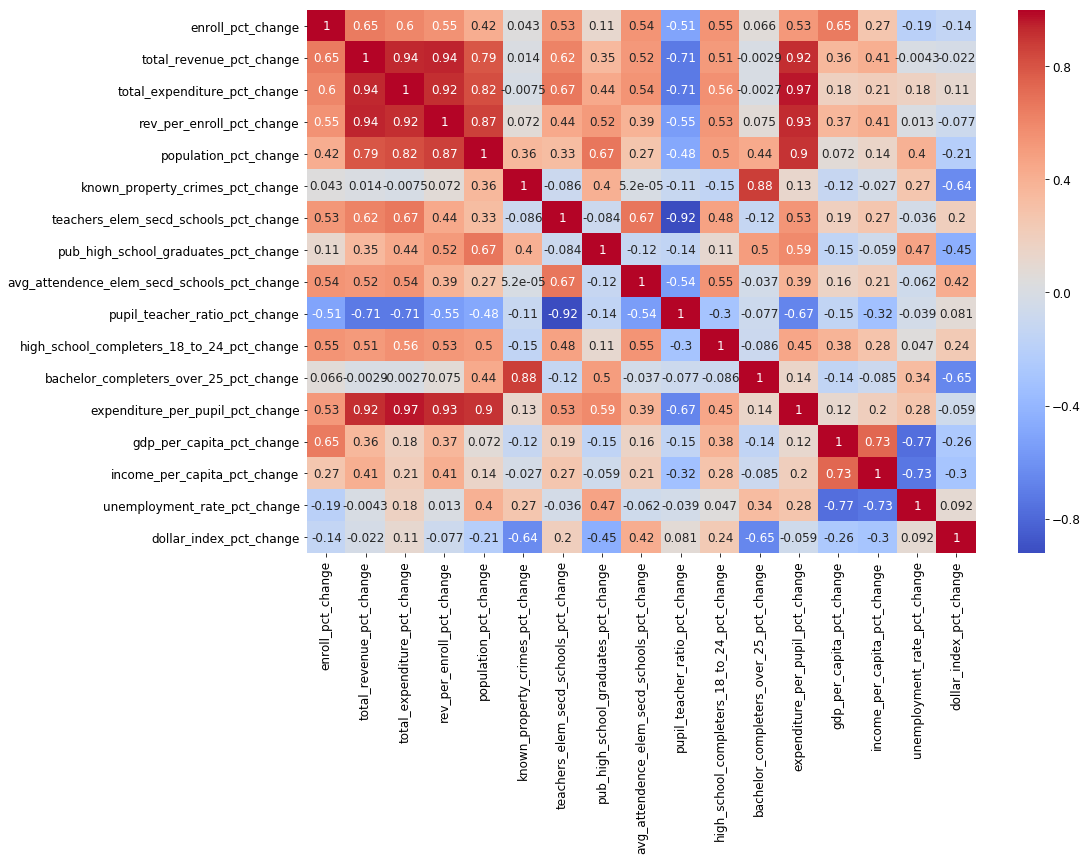

In [23]:
plt.figure(figsize = (15 ,10))
sns.heatmap(df_change[[x + '_pct_change' for x in income_outcome if not x == 'year']].corr(), 
            cmap = 'coolwarm',
            annot = True)

In [159]:
all_features = list(df_change.columns)
all_features

['year',
 'enroll_pct_change',
 'total_revenue_pct_change',
 'federal_revenue_pct_change',
 'state_revenue_pct_change',
 'local_revenue_pct_change',
 'total_expenditure_pct_change',
 'instruction_expenditure_pct_change',
 'support_services_expenditure_pct_change',
 'other_expenditure_pct_change',
 'capital_outlay_expenditure_pct_change',
 'total_known_expenditure_pct_change',
 'unknown_expenditure_pct_change',
 'rev_per_enroll_pct_change',
 'population_pct_change',
 'known_property_crimes_pct_change',
 'teachers_elem_secd_schools_pct_change',
 'pub_high_school_graduates_pct_change',
 'avg_attendence_elem_secd_schools_pct_change',
 'pupil_teacher_ratio_pct_change',
 'high_school_completers_18_to_24_pct_change',
 'bachelor_completers_over_25_pct_change',
 'expenditure_per_pupil_pct_change',
 'gdp_per_capita_pct_change',
 'income_per_capita_pct_change',
 'unemployment_rate_pct_change',
 'dollar_index_pct_change']

# 4. Random forest  feature importance analysis

In [160]:
from sklearn.ensemble import RandomForestRegressor

In [172]:
def RandomForestFeatureAnalysis(dataframe, response_name, n_forest = np.arange(50, 1000, 20)):
    global all_features
    df_tree = dataframe
    feature = all_features.copy()
    feature.remove(response_name)
    if 'year' in feature:
        feature.remove('year')
    X = df_tree[feature]
    y = df_tree[response_name]
        
    feature_score = []
    
    for n in n_forest:
        tree = RandomForestRegressor(n_estimators=n).fit(X,y)
        feature_score.append(tree.feature_importances_)

    # Random forest R^2 plot VS num_of_forest
    plt.figure(figsize = (10, 8))
    plt.plot(n_forest, feature_score)
    plt.xlabel('RANDOM FOREST number of forests')
    plt.ylabel('feature importance')
    plt.title('Random forest feature importance\n VS number of  forests')
    plt.legend(feature,bbox_to_anchor = (1.7,1), loc = 'upper right')
    plt.show()
    
    
    feature_df = pd.DataFrame(np.c_[feature_score][-10:].mean(axis = 0), index = features, columns=['importance'])

    plt.figure(figsize = (10, 8))
    _=sns.barplot(data = feature_df.reset_index().sort_values(by = 'importance',ascending = False ),
                x = 'importance', y = 'index', palette='Reds_r')
    _= plt.ylabel('features')
    _= plt.title('Feature Importance for \n' + response_name)
    plt.show()

## 4.1 Known poverty crimes percent change

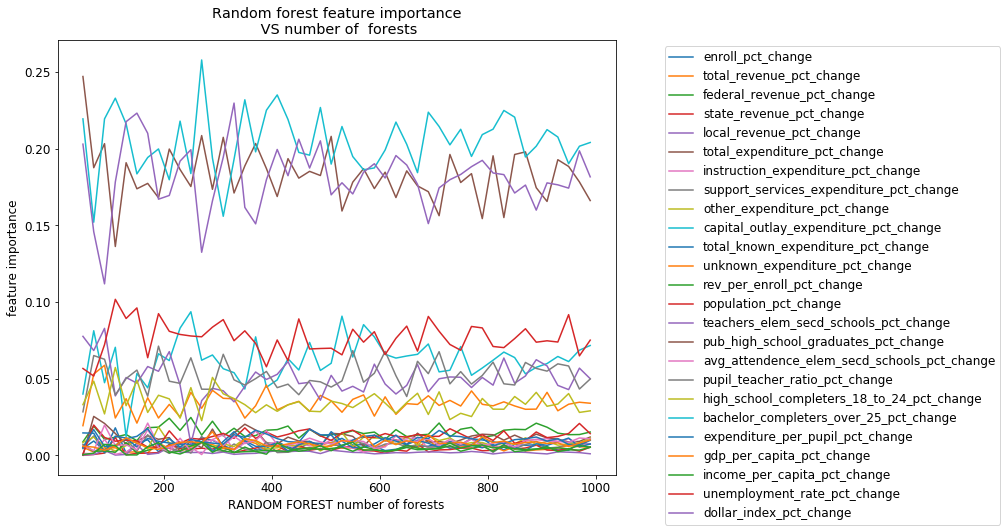

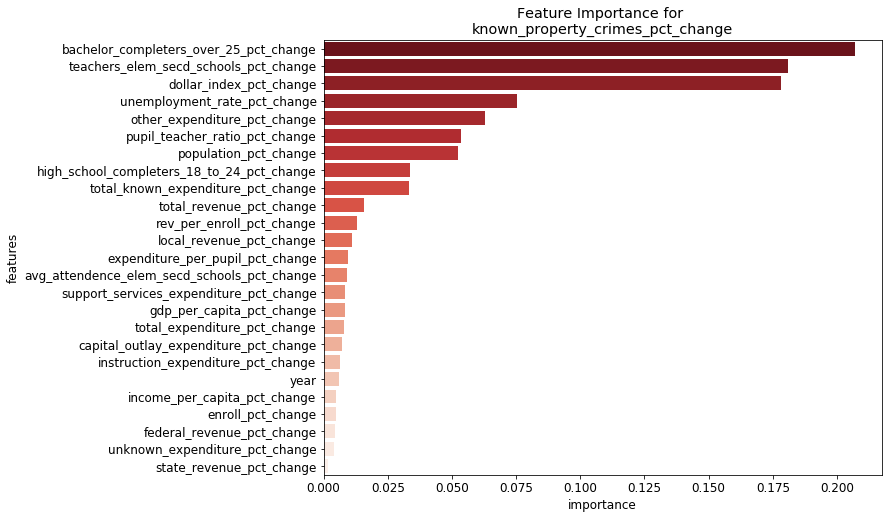

In [174]:
RandomForestFeatureAnalysis(df_change,'known_property_crimes_pct_change')

Top 3 correlated features:
+ bachelor_completers_over_25_pct_change
+ pub_high_school_graduates_pct_change
+ dollar_index_pct_change  
The national-wide property related crime rate is positively related above 3 factors 

## 4.2 public hight school graduates percent change

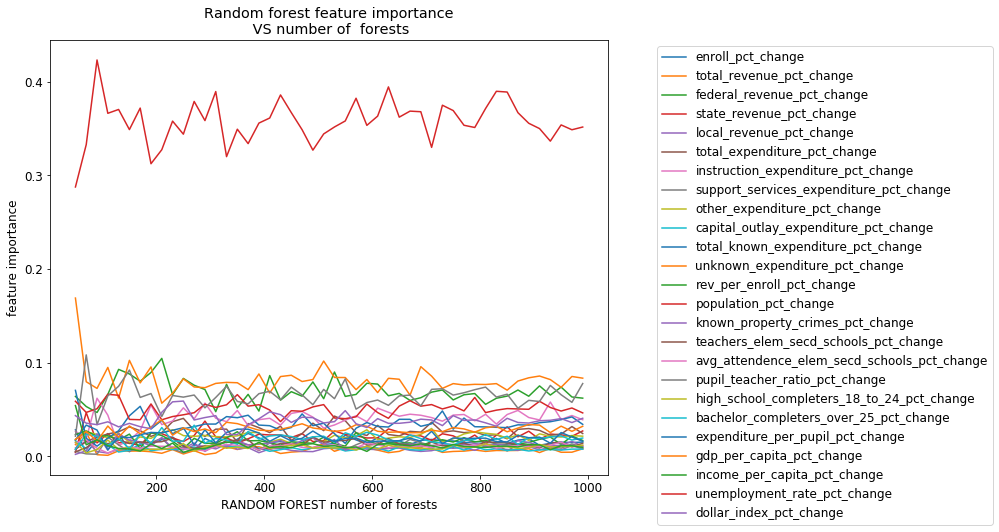

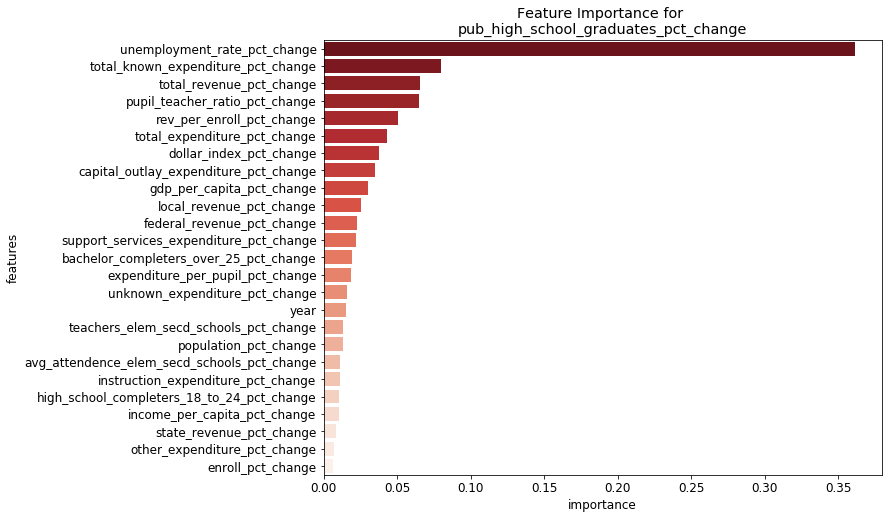

In [175]:
RandomForestFeatureAnalysis(df_change,'pub_high_school_graduates_pct_change')

**Observation**:  
Public high school graduates percent change is mostly related to unemployment rate percent change 

## 4.3 High school completers age 18 to 24 percent change

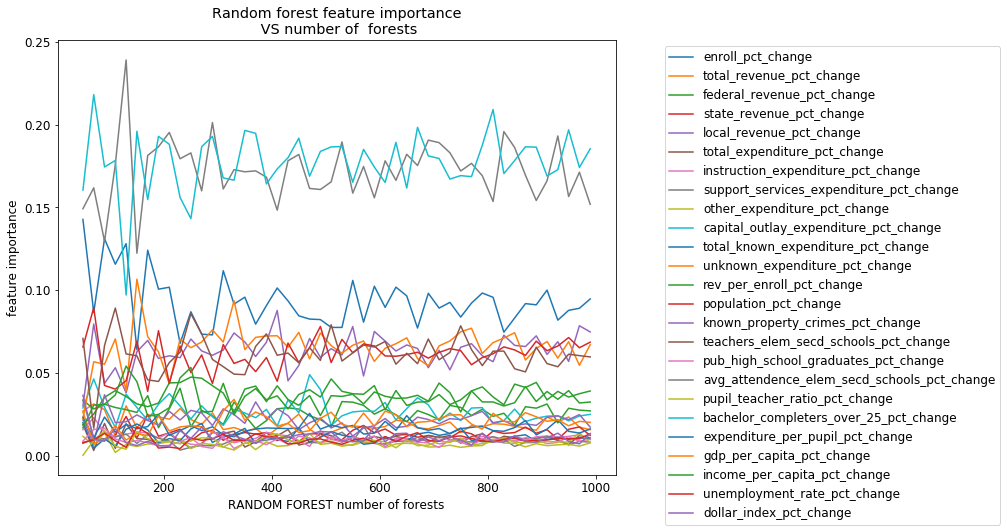

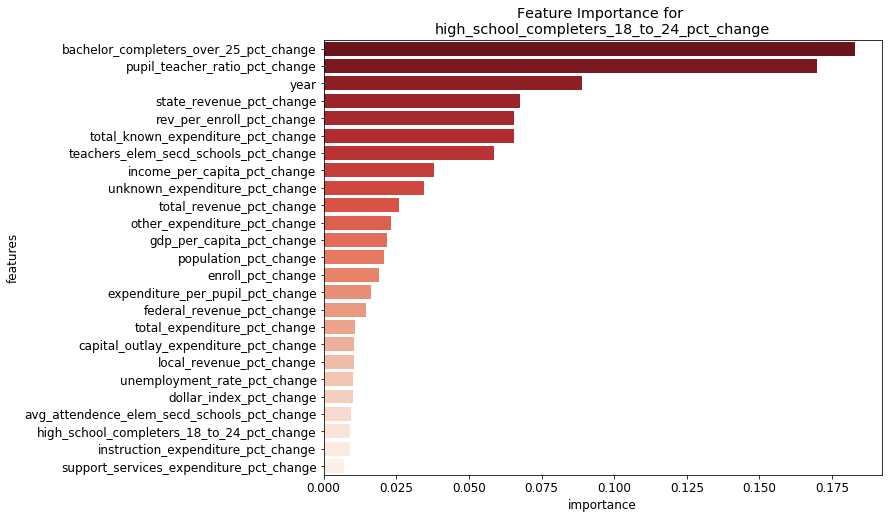

In [176]:
RandomForestFeatureAnalysis(df_change,'high_school_completers_18_to_24_pct_change')

**Obervation**:  
High school completers age 18 to 24 percent change is mostly related to:
+ bachelor completers over 25 years old percent change
+ pupil-teather ratio percent change


## 4.4 bachelor completers over 25 years old percent change

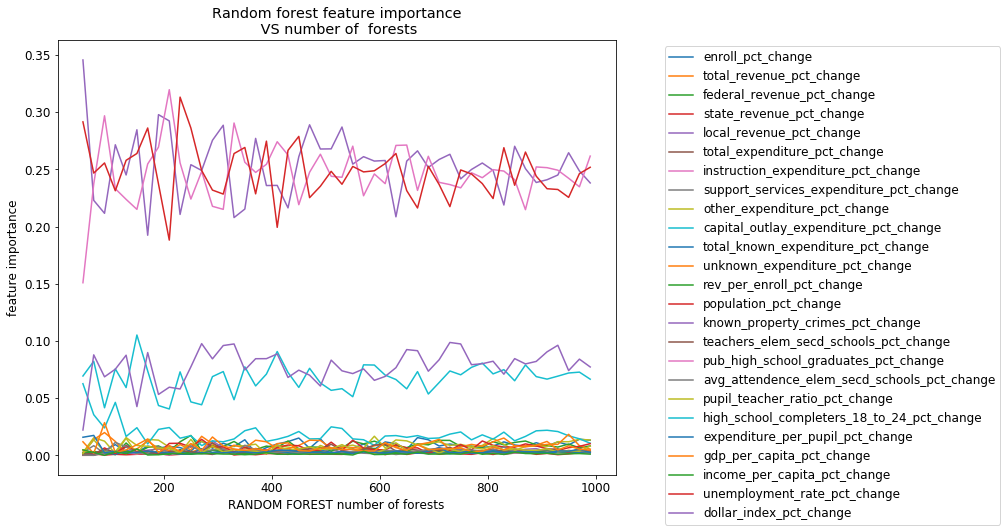

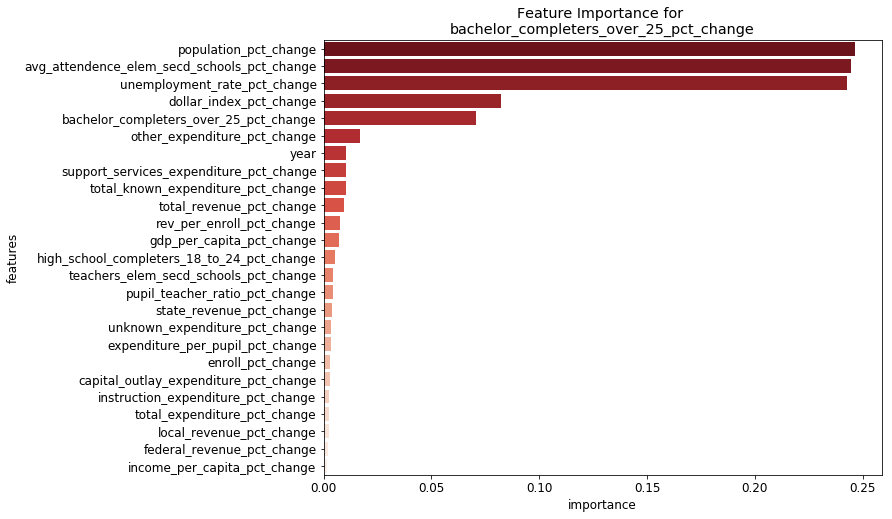

In [177]:
RandomForestFeatureAnalysis(df_change,'bachelor_completers_over_25_pct_change')

**Observations**  
bachelor completers over 25 years old percent change is mostly related to:
+ population percent change
+ unemployment rate percent change
+ avg_attendence_elem_secd_schools_pct_change

## 4.5 unemployment rate percent change

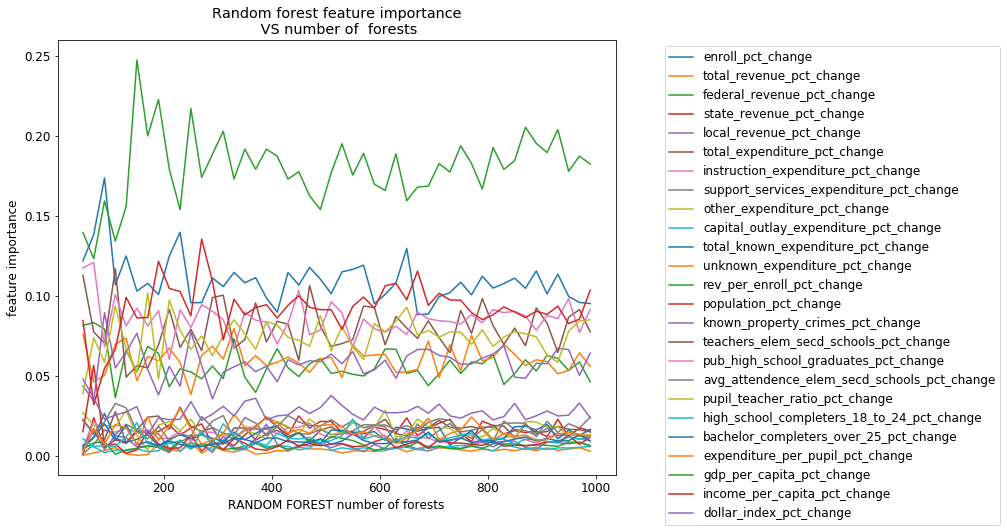

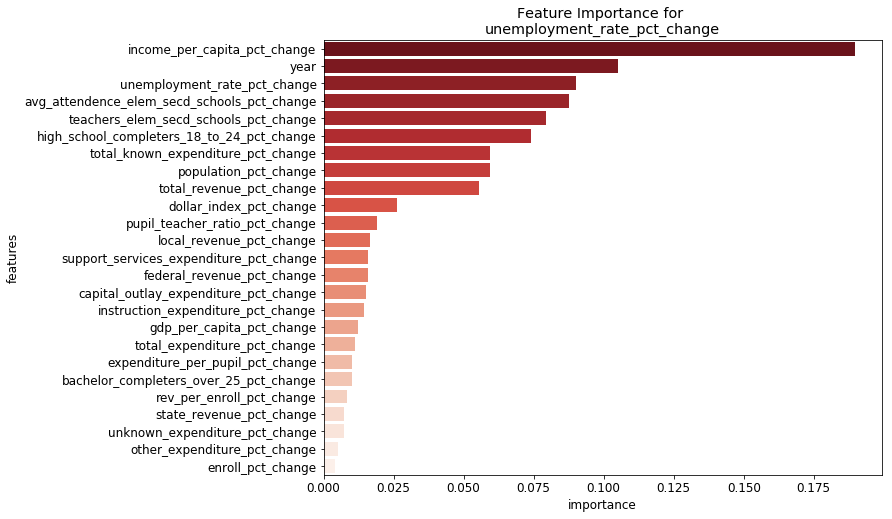

In [173]:
RandomForestFeatureAnalysis(df_change,'unemployment_rate_pct_change')

**Observation**:  
unemployment rate percent change is mostly related to income_per_capita percent change